# Movement Patterns

This visualizes how different people dragged between targets.

## Setup

In [1]:
from itertools import product
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import rpy2
import math
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

%load_ext rpy2.ipython
%matplotlib inline

pen_touch_palette = sns.color_palette("colorblind", 5)
sns.set_palette(pen_touch_palette)
curvature_palette = sns.color_palette("colorblind", 6)[2:]
distance_palette = sns.color_palette("Paired")
x1fold_palette = sns.color_palette("Paired")[2:]
angle_palette = sns.color_palette("colorblind", 12)
sns.set_style("whitegrid")
plt.rc('figure', figsize=(6.0, 4.0))

In [2]:
traj_df = pd.read_csv("../data/trajectories.csv")
traj_df

,participant,condition,condition_idx,prototype,curvature,input_type,block,task,start_idx,end_idx,is_long,angle,position_x,position_y,rot_position_x,rot_position_y,time
0,9,x1fold-pen,7,x1fold,12.0,pen,0,6,18,12.0,False,60.0,-2.731564,-4.941889,-5.645583,-0.105340,2323225.2
1,9,x1fold-pen,7,x1fold,12.0,pen,0,6,18,12.0,False,60.0,-2.744760,-4.928692,-5.640753,-0.087314,2323231.3
2,9,x1fold-pen,7,x1fold,12.0,pen,0,6,18,12.0,False,60.0,-2.744760,-4.915497,-5.629326,-0.080717,2323252.4
3,9,x1fold-pen,7,x1fold,12.0,pen,0,6,18,12.0,False,60.0,-2.731564,-4.915497,-5.622728,-0.092144,2323262.8
4,9,x1fold-pen,7,x1fold,12.0,pen,0,6,18,12.0,False,60.0,-2.718368,-4.915497,-5.616130,-0.103573,2323273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504546,14,x1fold-pen,4,x1fold,12.0,pen,2,9,21,15.0,False,330.0,5.515913,-3.054866,6.304354,0.112365,1432246.6
504547,14,x1fold-pen,4,x1fold,12.0,pen,2,9,21,15.0,False,330.0,5.581893,-3.041670,6.354896,0.156783,1432263.5
504548,14,x1fold-pen,4,x1fold,12.0,pen,2,9,21,15.0,False,330.0,5.595089,-3.041670,6.366324,0.163381,1432267.9
504549,14,x1fold-pen,4,x1fold,12.0,pen,2,9,21,15.0,False,330.0,5.608285,-3.068062,6.390948,0.147123,1432297.6


## Long drags with touch input

This shows drag trajectories on the 1mm and 24mm hinge radii prototypes at select angles.

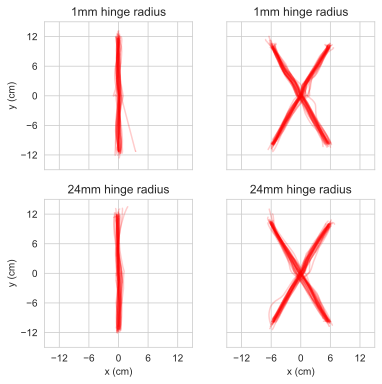

In [3]:
prototypes = ["1mm", "24mm"]
angles = [[270], [240, 300]]
f, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True)
for ax, (prototype, angles) in zip(axes.flat, product(prototypes, angles)):
    curr_df = pd.DataFrame(traj_df[
        (traj_df["prototype"] == prototype)
        & (traj_df["input_type"] == "touch")
        & (traj_df["is_long"] == True)
        & (traj_df["angle"].isin(angles))
    ])
    curr_df = curr_df.rename({"position_x": "x (cm)", "position_y": "y (cm)"}, axis=1)
    for participant in range(15):
        for block in range(2):
            for start_idx in range(12):
                sub_df = curr_df[
                    (curr_df["participant"] == participant)
                    & (curr_df["block"] == block)
                    & (curr_df["start_idx"] == start_idx)
                ]
                sns.lineplot(
                    data=sub_df,
                    x="x (cm)",
                    y="y (cm)",
                    color="red",
                    sort=False,
                    legend=False,
                    ax=ax,
                    alpha=.2,
                )
    ax.set_title(f"{prototype} hinge radius")
    ax.set(ylim=(-15, 15), xlim=(-15, 15))
    ax.set_aspect('equal')
    ax.set(xticks=[-12, -6, 0, 6, 12])
    ax.set(yticks=[-12, -6, 0, 6, 12])
plt.show()